# Análisis documentos CL

## Preparación

In [1]:
import os

ruta_data = os.path.join("..", "data", "processed")

In [2]:
with open(ruta_data + "/Boric_21.txt", "r") as f:
    ad_base = f.read()

print(ad_base)

 Plan de Gobierno Apruebo Dignidad Nuestro Plan de Gobierno tiene cuatro perspectivas transversales que recorren cada una de nuestras propuestas hacia la búsqueda de justicia social y desconcentración del poder: feminismo, transición ecológica justa, descentralización y garantía del trabajo decente. Feminismo Una perspectiva feminista de la sociedad y la economía tiene como eje principal la protección y la sostenibilidad de la vida, y con ello nos cuestionamos el rol de las dinámicas sociales, el marco normativo y las políticas públicas en el cuidado de la vida. Esta perspectiva también implica superar la división del trabajo por sexos, la distribución del poder y la erradicación de todo tipo de violencia hacia mujeres y disidencias sexuales. Para este propósito la apuesta feminista debe ser transversal, y la nuestra lo es. Comprometemos medidas para la erradicación de la violencia contra las mujeres, las disidencias y para la niñez y adolescencia. Así también presentamos un programa a

In [3]:
with open(ruta_data + "/Kast_21.txt", "r") as f:
    pr_base = f.read()

print(pr_base)

Chile en Paz y Orden El avance del narcotráfico y la llegada de crímenes violentos como los asesinatos por encargo las encerronas y los portonazos han dejado en evidencia las profundas debilidades en materias de seguridad. Sin ella, no tendremos   bienestar, desarrollo ni una vida digna. Es urgente recuperar la paz y el orden para que los chilenos vivan en un entorno estable donde puedan alcanzar sus sueños. Mayor seguridad: esa es la principal demanda. Los barrios tomados por la violencia, el narcotráfico y la delincuencia la han puesto como la primera     prioridad, lo que coincide con una extendida sensación de impunidad en todos los ámbitos. No hay vida digna sin paz, no tendremos bienestar sin estabilidad, no habrá desarrollo sin seguridad. Por eso, seremos el Gobierno que recuperará el Estado de Derecho, el Orden y la Autoridad, con liderazgo y sentido común, cumpliremos y haremos cumplir las leyes que resguardan la convivencia, el respeto a la dignidad y los derechos de todos lo

In [4]:
with open(ruta_data + "/Parisi_21.txt", "r") as f:
    pg_base = f.read()

print(pg_base)

     NUEVA INSTITUCIONALIDAD PUBLICA  1. Votación Representativa y Participativa  Esta propuesta de carácter general debe ser considerada como prioritaria, pues nos asegura que todas las propuestas que posteriormente presentemos y lleguen a ser ley de la República, no puedan ser cambiadas sin la aprobación de la ciudadanía .  Este simple concepto al ser plasmado en un artículo del texto de la Nueva Constitución sería suficiente para que, por primera vez en la historia de nuestro país, prime el derecho de la gente tal como está establecido en el artículo 5° de nuestra actual Constitución. Además, se debe velar por el cumplimiento de la Ley N°18.603, art. 21 y 32, que les prohíbe a los partidos políticos dar instrucciones simples o de votación a presidente, ministro, intendentes, gobernadores, alcaldes, concejales, diputados, s enadores ni a ningún empleado público.  Debe quedar estrictamente prohibido que los parlamentarios obtengan instrucciones de cualquier entidad, organización, pers

In [4]:
import re

In [5]:
ad_frases = re.split(pattern=r"\.\s*", string=ad_base)
len(ad_frases)

1731

In [6]:
pr_frases = re.split(pattern=r"\.\s*", string=pr_base)
len(pr_frases)

511

In [7]:
pg_frases = re.split(pattern=r"\.\s*", string=pg_base)
len(pg_frases)

1236

## Análisis de sentimiento

In [11]:
from transformers import AutoTokenizer, AutoModelForSequenceClassification, pipeline

/home/Benjamin/Escritorio/TIF/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm
2024-09-22 19:17:19.566938: I tensorflow/core/util/port.cc:153] oneDNN custom operations are on. You may see slightly different numerical results due to floating-point round-off errors from different computation orders. To turn them off, set the environment variable `TF_ENABLE_ONEDNN_OPTS=0`.
2024-09-22 19:17:19.771782: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:485] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-09-22 19:17:19.935237: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:8454] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-09-22 19:1

In [12]:
tokenizer = AutoTokenizer.from_pretrained("MMG/xlm-roberta-base-sa-spanish")

model = AutoModelForSequenceClassification.from_pretrained("MMG/xlm-roberta-base-sa-spanish")

pipe = pipeline("sentiment-analysis", model=model, tokenizer=tokenizer)

/home/Benjamin/Escritorio/TIF/.venv/lib/python3.12/site-packages/transformers/tokenization_utils_base.py:1601: FutureWarning: `clean_up_tokenization_spaces` was not set. It will be set to `True` by default. This behavior will be depracted in transformers v4.45, and will be then set to `False` by default. For more details check this issue: https://github.com/huggingface/transformers/issues/31884
  warnings.warn(


### Apruebo Dignidad

In [13]:
ad_sa = pipe(ad_frases)

In [14]:
ad_sa

[{'label': 'Neutral', 'score': 0.4056631922721863},
 {'label': 'Negative', 'score': 0.5327772498130798},
 {'label': 'Negative', 'score': 0.4978955388069153},
 {'label': 'Positive', 'score': 0.5088186860084534},
 {'label': 'Negative', 'score': 0.5187443494796753},
 {'label': 'Positive', 'score': 0.6451168060302734},
 {'label': 'Positive', 'score': 0.3612091541290283},
 {'label': 'Negative', 'score': 0.4729565382003784},
 {'label': 'Neutral', 'score': 0.3673413395881653},
 {'label': 'Negative', 'score': 0.36971527338027954},
 {'label': 'Neutral', 'score': 0.45607447624206543},
 {'label': 'Positive', 'score': 0.44979986548423767},
 {'label': 'Neutral', 'score': 0.35027047991752625},
 {'label': 'Negative', 'score': 0.8329951763153076},
 {'label': 'Negative', 'score': 0.8671126365661621},
 {'label': 'Negative', 'score': 0.8369555473327637},
 {'label': 'Neutral', 'score': 0.3841429054737091},
 {'label': 'Positive', 'score': 0.409373015165329},
 {'label': 'Neutral', 'score': 0.434098184108734

In [15]:
labels = []
scores = []

for i in ad_sa:
    labels.append(i['label'])
    scores.append(i['score'])

import pandas as pd

df_ad_sa = pd.DataFrame({'Frase':ad_frases, 'Etiqueta':labels, 'Puntuación':scores})

In [29]:
df_ad_sa['Partido'] = 'Apruebo Dignidad'

df_ad_sa

,Frase,Etiqueta,Puntuación,Partido
0,Plan de Gobierno Apruebo Dignidad Nuestro Pla...,Neutral,0.405663,Apruebo Dignidad
1,Feminismo Una perspectiva feminista de la soci...,Negative,0.532777,Apruebo Dignidad
2,Esta perspectiva también implica superar la di...,Negative,0.497896,Apruebo Dignidad
3,Para este propósito la apuesta feminista debe ...,Positive,0.508819,Apruebo Dignidad
4,Comprometemos medidas para la erradicación de ...,Negative,0.518744,Apruebo Dignidad
...,...,...,...,...
1726,También contribuirá a mejorar la experiencia d...,Neutral,0.416937,Apruebo Dignidad
1727,Simultáneamente proponemos fortalecer las estr...,Neutral,0.445248,Apruebo Dignidad
1728,Lo anterior sin perjuicio de garantizar la pr...,Neutral,0.474721,Apruebo Dignidad
1729,Ver más detalle en el capítulo de Transformaci...,Neutral,0.410376,Apruebo Dignidad


In [30]:
df_ad_sa.to_csv(ruta_data + "/sentiment_analysis_ad.csv", index=False)

### Republicanos

In [18]:
pr_sa = pipe(pr_frases)

In [19]:
pr_sa

[{'label': 'Negative', 'score': 0.727172315120697},
 {'label': 'Negative', 'score': 0.7068824172019958},
 {'label': 'Positive', 'score': 0.5306775569915771},
 {'label': 'Neutral', 'score': 0.3937492072582245},
 {'label': 'Negative', 'score': 0.8015028834342957},
 {'label': 'Negative', 'score': 0.6656394600868225},
 {'label': 'Positive', 'score': 0.4833013713359833},
 {'label': 'Negative', 'score': 0.7020859122276306},
 {'label': 'Negative', 'score': 0.6142047047615051},
 {'label': 'Negative', 'score': 0.483745813369751},
 {'label': 'Positive', 'score': 0.5109359622001648},
 {'label': 'Negative', 'score': 0.7953405380249023},
 {'label': 'Negative', 'score': 0.7873297333717346},
 {'label': 'Negative', 'score': 0.5260552763938904},
 {'label': 'Neutral', 'score': 0.45138686895370483},
 {'label': 'Negative', 'score': 0.6365987658500671},
 {'label': 'Neutral', 'score': 0.549263060092926},
 {'label': 'Neutral', 'score': 0.4890887141227722},
 {'label': 'Negative', 'score': 0.5848678946495056},

In [20]:
labels = []
scores = []

for i in pr_sa:
    labels.append(i['label'])
    scores.append(i['score'])

import pandas as pd

df_pr_sa = pd.DataFrame({'Frase':pr_frases, 'Etiqueta':labels, 'Puntuación':scores})

In [31]:
df_pr_sa["Partido"] = "Partido Republicano"

df_pr_sa

,Frase,Etiqueta,Puntuación,Partido
0,Chile en Paz y Orden El avance del narcotráfic...,Negative,0.727172,Partido Republicano
1,"Sin ella, no tendremos bienestar, desarrollo...",Negative,0.706882,Partido Republicano
2,Es urgente recuperar la paz y el orden para qu...,Positive,0.530678,Partido Republicano
3,Mayor seguridad: esa es la principal demanda,Neutral,0.393749,Partido Republicano
4,"Los barrios tomados por la violencia, el narco...",Negative,0.801503,Partido Republicano
...,...,...,...,...
506,Avanzaremos hacia la movilidad eléctrica en el...,Neutral,0.476244,Partido Republicano
507,Promoveremos la construcción de trenes eléctri...,Neutral,0.439971,Partido Republicano
508,La estructura regulatoria sectorial es complej...,Neutral,0.439135,Partido Republicano
509,Fomentaremos la investigación tecnológica en e...,Neutral,0.478167,Partido Republicano


In [32]:
df_pr_sa.to_csv(ruta_data + "/sentiment_analysis_pr.csv", index=False)

### Partido de la Gente

In [23]:
pg_sa = pipe(pg_frases)

In [24]:
pg_sa

[{'label': 'Neutral', 'score': 0.5880935192108154},
 {'label': 'Neutral', 'score': 0.42754796147346497},
 {'label': 'Neutral', 'score': 0.35537898540496826},
 {'label': 'Neutral', 'score': 0.4575832188129425},
 {'label': 'Neutral', 'score': 0.6496021747589111},
 {'label': 'Negative', 'score': 0.680975079536438},
 {'label': 'Negative', 'score': 0.6744546294212341},
 {'label': 'Neutral', 'score': 0.48320117592811584},
 {'label': 'Neutral', 'score': 0.43081897497177124},
 {'label': 'Neutral', 'score': 0.49552276730537415},
 {'label': 'Neutral', 'score': 0.5672020316123962},
 {'label': 'Neutral', 'score': 0.42156627774238586},
 {'label': 'Neutral', 'score': 0.42156627774238586},
 {'label': 'Neutral', 'score': 0.42156627774238586},
 {'label': 'Neutral', 'score': 0.5044316649436951},
 {'label': 'Neutral', 'score': 0.454751580953598},
 {'label': 'Neutral', 'score': 0.3743079602718353},
 {'label': 'Neutral', 'score': 0.5223259329795837},
 {'label': 'Neutral', 'score': 0.47022899985313416},
 {'

In [25]:
labels = []
scores = []

for i in pg_sa:
    labels.append(i['label'])
    scores.append(i['score'])

import pandas as pd

df_pg_sa = pd.DataFrame({'Frase':pg_frases, 'Etiqueta':labels, 'Puntuación':scores})

In [33]:
df_pg_sa["Partido"] = "Partido de la Gente"

df_pg_sa

,Frase,Etiqueta,Puntuación,Partido
0,NUEVA INSTITUCIONALIDAD PUBLICA 1,Neutral,0.588094,Partido de la Gente
1,Votación Representativa y Participativa Esta ...,Neutral,0.427548,Partido de la Gente
2,Este simple concepto al ser plasmado en un art...,Neutral,0.355379,Partido de la Gente
3,"Además, se debe velar por el cumplimiento de l...",Neutral,0.457583,Partido de la Gente
4,"603, art",Neutral,0.649602,Partido de la Gente
...,...,...,...,...
1231,Los militantes del Partido de la Gente exhibir...,Positive,0.379079,Partido de la Gente
1232,"Finalmente, como país estamos ad-portas de una...",Negative,0.774186,Partido de la Gente
1233,Las chilenas y chilenos tenemos casi todos los...,Positive,0.453196,Partido de la Gente
1234,"Este documento está en proceso, pero tenemos l...",Positive,0.367709,Partido de la Gente


In [34]:
df_pg_sa.to_csv(ruta_data + "/sentiment_analysis_pg.csv", index=False)

### Comparando resultados

In [35]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

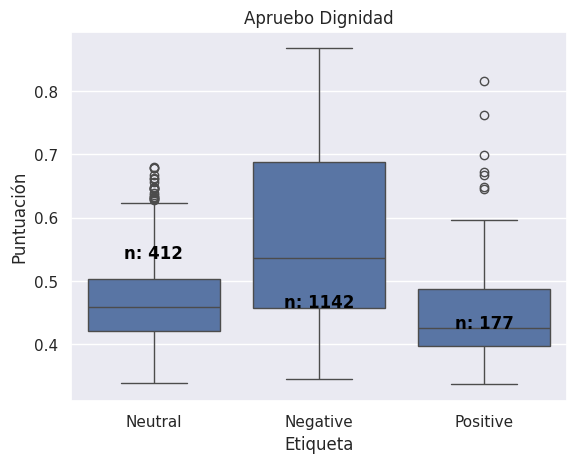

In [36]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_ad_sa['Etiqueta'], y=df_ad_sa['Puntuación'])

medians = df_ad_sa.groupby('Etiqueta')['Puntuación'].median().values
nobs = df_ad_sa.groupby('Etiqueta').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " +  i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title("Apruebo Dignidad")
plt.show()

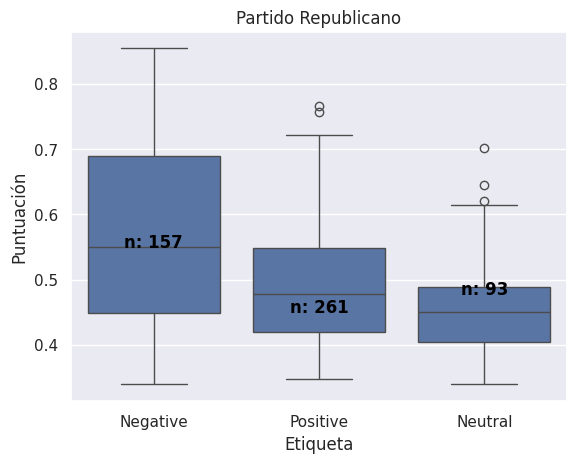

In [37]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_pr_sa['Etiqueta'], y=df_pr_sa['Puntuación'])

medians = df_pr_sa.groupby('Etiqueta')['Puntuación'].median().values
nobs = df_pr_sa.groupby('Etiqueta').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " +  i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title("Partido Republicano")
plt.show()

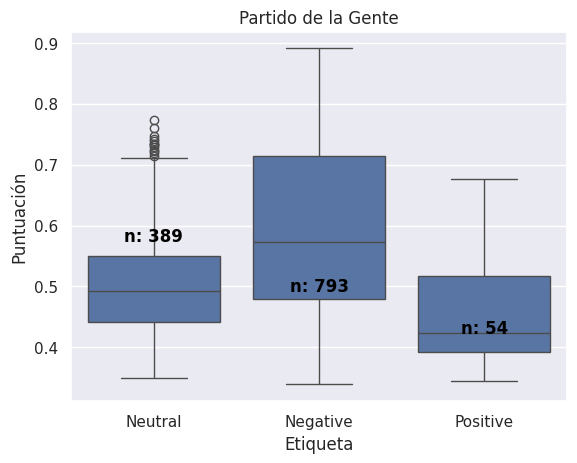

In [38]:
sns.set_theme(style="darkgrid")
ax = sns.boxplot(x=df_pg_sa['Etiqueta'], y=df_pg_sa['Puntuación'])

medians = df_pg_sa.groupby('Etiqueta')['Puntuación'].median().values
nobs = df_pg_sa.groupby('Etiqueta').size().values
nobs = [str(x) for x in nobs.tolist()]
nobs = ["n: " +  i for i in nobs]

pos = range(len(nobs))
for tick,label in zip(pos, ax.get_xticklabels()):
    plt.text(pos[tick], medians[tick], nobs[tick], horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title("Partido de la Gente")
plt.show()

In [50]:
part_cl = pd.concat([df_ad_sa, df_pr_sa, df_pg_sa])

n_etiq = part_cl.groupby(['Partido', 'Etiqueta']).count().reset_index()

n_etiq

,Partido,Etiqueta,Frase,Puntuación
0,Apruebo Dignidad,Negative,412,412
1,Apruebo Dignidad,Neutral,1142,1142
2,Apruebo Dignidad,Positive,177,177
3,Partido Republicano,Negative,157,157
4,Partido Republicano,Neutral,261,261
5,Partido Republicano,Positive,93,93
6,Partido de la Gente,Negative,389,389
7,Partido de la Gente,Neutral,793,793
8,Partido de la Gente,Positive,54,54


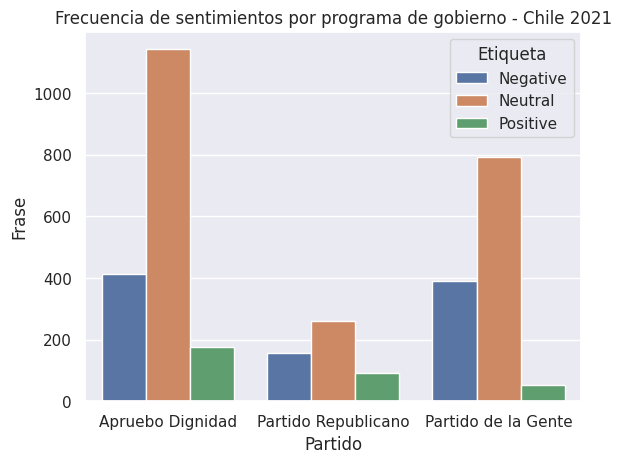

In [42]:
sns.barplot(x = n_etiq['Partido'], y = n_etiq['Frase'], hue=n_etiq['Etiqueta'])
plt.title("Frecuencia de sentimientos por programa de gobierno - Chile 2021")
plt.show()

In [51]:
n_etiq['Total'] = n_etiq.groupby('Partido')['Frase'].transform('sum')

n_etiq['Porcentajes'] = n_etiq['Frase']/n_etiq["Total"]*100

In [52]:
n_etiq

,Partido,Etiqueta,Frase,Puntuación,Total,Porcentajes
0,Apruebo Dignidad,Negative,412,412,1731,23.801271
1,Apruebo Dignidad,Neutral,1142,1142,1731,65.973426
2,Apruebo Dignidad,Positive,177,177,1731,10.225303
3,Partido Republicano,Negative,157,157,511,30.724070
4,Partido Republicano,Neutral,261,261,511,51.076321
5,Partido Republicano,Positive,93,93,511,18.199609
6,Partido de la Gente,Negative,389,389,1236,31.472492
7,Partido de la Gente,Neutral,793,793,1236,64.158576
8,Partido de la Gente,Positive,54,54,1236,4.368932


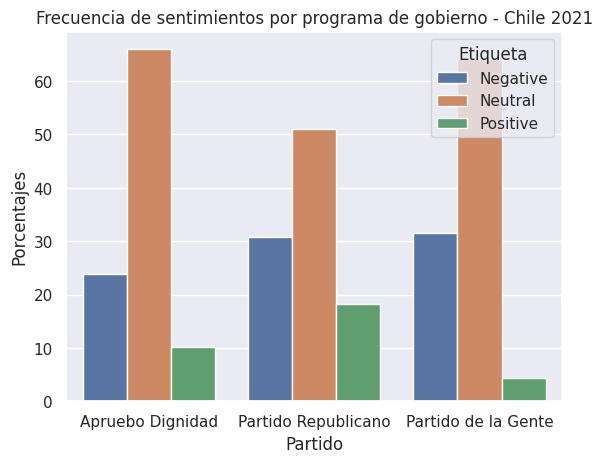

In [53]:
sns.barplot(x = n_etiq['Partido'], y = n_etiq['Porcentajes'], hue=n_etiq['Etiqueta'])
plt.title("Frecuencia de sentimientos por programa de gobierno - Chile 2021")
plt.show()

## LDA

In [8]:
from sklearn.feature_extraction.text import  CountVectorizer
from sklearn.decomposition import LatentDirichletAllocation
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
import pandas as pd

In [9]:
stop_words = set(stopwords.words('spanish'))

def tokenizar(texto):
    tokenizado = word_tokenize(texto.lower())
    pal_filtradas = [word for word in tokenizado if word.isalnum() and word not in stop_words]
    text_filtrado = ' '.join(pal_filtradas)
    return text_filtrado

In [10]:
sw_2 = []

for i in stop_words:
    sw_2.append(i)

In [11]:
ad_tok = tokenizar(ad_base)
pr_tok = tokenizar(pr_base)
pg_tok = tokenizar(pg_base)

### AD

In [39]:
vect_1 = CountVectorizer(stop_words=sw_2)
X1 = vect_1.fit_transform(ad_tok.split(" "))

In [40]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X1)

LatentDirichletAllocation(random_state=42)

In [41]:
for index, topic in enumerate(lda.components_):
    print(f'Tema {index}:')
    print([vect_1.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Tema 0:
['públicos', 'formación', 'estrategia', 'manera', 'programa', 'violencia', 'recursos', 'derecho', 'país', 'personas']
Tema 1:
['perspectiva', 'debe', 'gobiernos', 'plazo', 'cuidado', 'laboral', 'avanzar', 'creación', 'innovación', 'gestión']
Tema 2:
['situación', 'inversión', 'red', 'territorios', 'centros', 'forma', 'trabajo', 'nacional', 'salud', 'sistema']
Tema 3:
['locales', 'calidad', 'crisis', 'todas', 'ello', 'chile', 'mayor', 'participación', 'social', 'género']
Tema 4:
['objetivo', 'fortalecer', 'instrumentos', 'proyectos', 'investigación', 'público', 'financiamiento', 'gobierno', 'acceso', 'derechos']
Tema 5:
['mecanismos', 'espacios', 'públicas', 'integral', 'vida', 'proponemos', 'pública', 'medidas', 'política', 'desarrollo']
Tema 6:
['sector', 'fortaleceremos', 'servicios', 'modelo', 'plan', 'programas', 'sociales', 'condiciones', 'regionales', 'enfoque']
Tema 7:
['materia', 'parte', 'sociedad', 'atención', 'nueva', 'través', 'proceso', 'nuevo', 'educación', 'ley']

In [42]:
words = vect_1.get_feature_names_out()

n_top_words = 10

topic_words = []
topic_weights = []

for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]

    top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in top_indices]

    topic_words.append(top_words)
    topic_weights.append(top_weights)

df_words = pd.DataFrame(topic_words)
df_weights = pd.DataFrame(topic_weights)

df_words.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_weights.columns = [f"Peso {i+1}" for i in range(n_top_words)]

df_topics = pd.concat([df_words, df_weights], axis=1)
#df_topics.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_topics.index = [f'Tópico {i+1}' for i in range(lda.n_components)]

In [43]:
df_words.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_words = df_words.reset_index()
df_words = df_words.melt(id_vars='index', value_vars=[f"Palabra {i+1}" for i in range(n_top_words)], var_name="Orden", value_name="Palabra")

df_words

,index,Orden,Palabra
0,Tópico 1,Palabra 1,personas
1,Tópico 2,Palabra 1,gestión
2,Tópico 3,Palabra 1,sistema
3,Tópico 4,Palabra 1,género
4,Tópico 5,Palabra 1,derechos
...,...,...,...
95,Tópico 6,Palabra 10,mecanismos
96,Tópico 7,Palabra 10,sector
97,Tópico 8,Palabra 10,materia
98,Tópico 9,Palabra 10,infraestructura


In [44]:
df_weights.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_weights = df_weights.reset_index()
df_weights = df_weights.melt(id_vars='index', value_vars=[f"Peso {i+1}" for i in range(n_top_words)], var_name="Orden_peso", value_name="Peso")


df_weights

,index,Orden_peso,Peso
0,Tópico 1,Peso 1,155.1
1,Tópico 2,Peso 1,65.1
2,Tópico 3,Peso 1,167.1
3,Tópico 4,Peso 1,87.1
4,Tópico 5,Peso 1,105.1
...,...,...,...
95,Tópico 6,Peso 10,43.1
96,Tópico 7,Peso 10,42.1
97,Tópico 8,Peso 10,38.1
98,Tópico 9,Peso 10,34.1


In [45]:
full_merged = df_words
full_merged['Peso'] = df_weights['Peso']

full_merged

,index,Orden,Palabra,Peso
0,Tópico 1,Palabra 1,personas,155.1
1,Tópico 2,Palabra 1,gestión,65.1
2,Tópico 3,Palabra 1,sistema,167.1
3,Tópico 4,Palabra 1,género,87.1
4,Tópico 5,Palabra 1,derechos,105.1
...,...,...,...,...
95,Tópico 6,Palabra 10,mecanismos,43.1
96,Tópico 7,Palabra 10,sector,42.1
97,Tópico 8,Palabra 10,materia,38.1
98,Tópico 9,Palabra 10,infraestructura,34.1


In [46]:
full_merged['Peso_total'] = full_merged.groupby('index')['Peso'].transform('sum')

full_merged['Peso_tópico'] = full_merged['Peso']/full_merged['Peso_total'] * 100

full_merged

,index,Orden,Palabra,Peso,Peso_total,Peso_tópico
0,Tópico 1,Palabra 1,personas,155.1,636.0,24.386792
1,Tópico 2,Palabra 1,gestión,65.1,427.0,15.245902
2,Tópico 3,Palabra 1,sistema,167.1,767.0,21.786180
3,Tópico 4,Palabra 1,género,87.1,582.0,14.965636
4,Tópico 5,Palabra 1,derechos,105.1,516.0,20.368217
...,...,...,...,...,...,...
95,Tópico 6,Palabra 10,mecanismos,43.1,699.0,6.165951
96,Tópico 7,Palabra 10,sector,42.1,538.0,7.825279
97,Tópico 8,Palabra 10,materia,38.1,654.0,5.825688
98,Tópico 9,Palabra 10,infraestructura,34.1,477.0,7.148847


In [47]:
full_merged.to_csv(ruta_data + "/lda_AD_CL.csv", index=False)

### P. Republicano

In [48]:
vect_2 = CountVectorizer(stop_words=sw_2)
X2 = vect_2.fit_transform(pr_tok.split(" "))

In [49]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X2)

LatentDirichletAllocation(random_state=42)

In [50]:
for index, topic in enumerate(lda.components_):
    print(f'Tema {index}:')
    print([vect_2.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Tema 0:
['centros', 'problemas', 'énfasis', 'prevención', 'cultura', 'cada', 'impulsaremos', 'ello', 'mayor', 'trabajo']
Tema 1:
['subsidio', 'investigación', 'público', 'participación', 'políticas', 'empresas', 'chile', 'mujer', 'sistema', 'salud']
Tema 2:
['pueda', 'crearemos', 'organizaciones', 'privados', 'derecho', 'través', 'conservación', 'apoyo', 'calidad', 'proponemos']
Tema 3:
['gobierno', 'ciudades', 'permita', 'fortaleceremos', 'planes', 'avanzaremos', 'mejoraremos', 'forma', 'país', 'programas']
Tema 4:
['instituciones', 'inversión', 'materia', 'atención', 'acción', 'capacidad', 'fomentar', 'objeto', 'política', 'áreas']
Tema 5:
['laboral', 'uso', 'proyectos', 'recursos', 'ambiental', 'manera', 'protección', 'públicos', 'desarrollo', 'mujeres']
Tema 6:
['integración', 'cuidado', 'bienes', 'programa', 'nuevas', 'hoy', 'medidas', 'además', 'puedan', 'personas']
Tema 7:
['mayores', 'públicas', 'especialmente', 'tecnologías', 'sociedad', 'vivienda', 'todas', 'seguridad', 'así'

In [51]:
words = vect_2.get_feature_names_out()

n_top_words = 10

topic_words = []
topic_weights = []

for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]

    top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in top_indices]

    topic_words.append(top_words)
    topic_weights.append(top_weights)

df_words = pd.DataFrame(topic_words)
df_weights = pd.DataFrame(topic_weights)

df_words.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_weights.columns = [f"Peso {i+1}" for i in range(n_top_words)]

df_topics = pd.concat([df_words, df_weights], axis=1)
#df_topics.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_topics.index = [f'Tópico {i+1}' for i in range(lda.n_components)]

In [52]:
df_words.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_words = df_words.reset_index()
df_words = df_words.melt(id_vars='index', value_vars=[f"Palabra {i+1}" for i in range(n_top_words)], var_name="Orden", value_name="Palabra")

df_words

,index,Orden,Palabra
0,Tópico 1,Palabra 1,trabajo
1,Tópico 2,Palabra 1,salud
2,Tópico 3,Palabra 1,proponemos
3,Tópico 4,Palabra 1,programas
4,Tópico 5,Palabra 1,áreas
...,...,...,...
95,Tópico 6,Palabra 10,laboral
96,Tópico 7,Palabra 10,integración
97,Tópico 8,Palabra 10,mayores
98,Tópico 9,Palabra 10,actuales


In [53]:
df_weights.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_weights = df_weights.reset_index()
df_weights = df_weights.melt(id_vars='index', value_vars=[f"Peso {i+1}" for i in range(n_top_words)], var_name="Orden_peso", value_name="Peso")


df_weights

,index,Orden_peso,Peso
0,Tópico 1,Peso 1,27.1
1,Tópico 2,Peso 1,56.1
2,Tópico 3,Peso 1,37.1
3,Tópico 4,Peso 1,34.1
4,Tópico 5,Peso 1,16.1
...,...,...,...
95,Tópico 6,Peso 10,14.1
96,Tópico 7,Peso 10,12.1
97,Tópico 8,Peso 10,12.1
98,Tópico 9,Peso 10,11.1


In [54]:
full_merged = df_words
full_merged['Peso'] = df_weights['Peso']

full_merged

,index,Orden,Palabra,Peso
0,Tópico 1,Palabra 1,trabajo,27.1
1,Tópico 2,Palabra 1,salud,56.1
2,Tópico 3,Palabra 1,proponemos,37.1
3,Tópico 4,Palabra 1,programas,34.1
4,Tópico 5,Palabra 1,áreas,16.1
...,...,...,...,...
95,Tópico 6,Palabra 10,laboral,14.1
96,Tópico 7,Palabra 10,integración,12.1
97,Tópico 8,Palabra 10,mayores,12.1
98,Tópico 9,Palabra 10,actuales,11.1


In [55]:
full_merged['Peso_total'] = full_merged.groupby('index')['Peso'].transform('sum')

full_merged['Peso_tópico'] = full_merged['Peso']/full_merged['Peso_total'] * 100

full_merged

,index,Orden,Palabra,Peso,Peso_total,Peso_tópico
0,Tópico 1,Palabra 1,trabajo,27.1,195.0,13.897436
1,Tópico 2,Palabra 1,salud,56.1,210.0,26.714286
2,Tópico 3,Palabra 1,proponemos,37.1,185.0,20.054054
3,Tópico 4,Palabra 1,programas,34.1,185.0,18.432432
4,Tópico 5,Palabra 1,áreas,16.1,126.0,12.777778
...,...,...,...,...,...,...
95,Tópico 6,Palabra 10,laboral,14.1,226.0,6.238938
96,Tópico 7,Palabra 10,integración,12.1,205.0,5.902439
97,Tópico 8,Palabra 10,mayores,12.1,179.0,6.759777
98,Tópico 9,Palabra 10,actuales,11.1,197.0,5.634518


In [56]:
full_merged.to_csv(ruta_data + "/lda_PR_CL.csv", index=False)

### P. de la gente

In [57]:
vect_3 = CountVectorizer(stop_words=sw_2)
X3 = vect_3.fit_transform(pg_tok.split(" "))

In [58]:
lda = LatentDirichletAllocation(n_components=10, random_state=42)
lda.fit(X3)

LatentDirichletAllocation(random_state=42)

In [59]:
for index, topic in enumerate(lda.components_):
    print(f'Tema {index}:')
    print([vect_3.get_feature_names_out()[i] for i in topic.argsort()[-10:]])

Tema 0:
['gestión', 'energía', 'así', 'ministerio', 'medio', 'creación', 'servicios', 'ambiente', 'año', 'años']
Tema 1:
['banco', 'pago', 'áreas', 'fondos', 'actividad', 'región', 'puede', 'tener', 'recursos', 'chile']
Tema 2:
['según', 'acuerdo', 'toda', 'actividades', 'diferentes', 'social', 'si', 'impuesto', 'suelo', 'ser']
Tema 3:
['ello', 'unidad', 'zona', 'forma', 'nivel', 'manera', 'todas', 'https', 'mejorar', 'debe']
Tema 4:
['mediante', 'construcción', 'actualmente', 'cargo', 'protección', 'ejemplo', 'general', 'educación', 'propone', 'salud']
Tema 5:
['vida', 'fiscalización', 'aguas', 'solo', 'valor', 'caso', 'además', 'ambiental', 'país', 'ley']
Tema 6:
['internacionales', 'entregar', 'organismos', 'parte', 'apoyo', 'calidad', 'suelos', 'agua', 'personas', 'desarrollo']
Tema 7:
['viviendas', 'beneficio', 'tipo', 'proyectos', 'cada', 'deben', 'necesario', 'atención', 'sistema', 'empresas']
Tema 8:
['fin', 'puedan', 'través', 'población', 'zonas', 'público', 'recurso', 'traba

In [60]:
words = vect_3.get_feature_names_out()

n_top_words = 10

topic_words = []
topic_weights = []

for index, topic in enumerate(lda.components_):
    top_indices = topic.argsort()[:-n_top_words - 1:-1]

    top_words = [words[i] for i in topic.argsort()[:-n_top_words - 1:-1]]
    top_weights = [topic[i] for i in top_indices]

    topic_words.append(top_words)
    topic_weights.append(top_weights)

df_words = pd.DataFrame(topic_words)
df_weights = pd.DataFrame(topic_weights)

df_words.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_weights.columns = [f"Peso {i+1}" for i in range(n_top_words)]

df_topics = pd.concat([df_words, df_weights], axis=1)
#df_topics.columns = [f"Palabra {i+1}" for i in range(n_top_words)]
df_topics.index = [f'Tópico {i+1}' for i in range(lda.n_components)]

In [61]:
df_words.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_words = df_words.reset_index()
df_words = df_words.melt(id_vars='index', value_vars=[f"Palabra {i+1}" for i in range(n_top_words)], var_name="Orden", value_name="Palabra")

df_words

,index,Orden,Palabra
0,Tópico 1,Palabra 1,años
1,Tópico 2,Palabra 1,chile
2,Tópico 3,Palabra 1,ser
3,Tópico 4,Palabra 1,debe
4,Tópico 5,Palabra 1,salud
...,...,...,...
95,Tópico 6,Palabra 10,vida
96,Tópico 7,Palabra 10,internacionales
97,Tópico 8,Palabra 10,viviendas
98,Tópico 9,Palabra 10,fin


In [62]:
df_weights.index = [f'Tópico {i+1}' for i in range(lda.n_components)]
df_weights = df_weights.reset_index()
df_weights = df_weights.melt(id_vars='index', value_vars=[f"Peso {i+1}" for i in range(n_top_words)], var_name="Orden_peso", value_name="Peso")


df_weights

,index,Orden_peso,Peso
0,Tópico 1,Peso 1,39.1
1,Tópico 2,Peso 1,88.1
2,Tópico 3,Peso 1,69.1
3,Tópico 4,Peso 1,55.1
4,Tópico 5,Peso 1,57.1
...,...,...,...
95,Tópico 6,Peso 10,22.1
96,Tópico 7,Peso 10,15.1
97,Tópico 8,Peso 10,20.1
98,Tópico 9,Peso 10,15.1


In [63]:
full_merged = df_words
full_merged['Peso'] = df_weights['Peso']

full_merged

,index,Orden,Palabra,Peso
0,Tópico 1,Palabra 1,años,39.1
1,Tópico 2,Palabra 1,chile,88.1
2,Tópico 3,Palabra 1,ser,69.1
3,Tópico 4,Palabra 1,debe,55.1
4,Tópico 5,Palabra 1,salud,57.1
...,...,...,...,...
95,Tópico 6,Palabra 10,vida,22.1
96,Tópico 7,Palabra 10,internacionales,15.1
97,Tópico 8,Palabra 10,viviendas,20.1
98,Tópico 9,Palabra 10,fin,15.1


In [64]:
full_merged['Peso_total'] = full_merged.groupby('index')['Peso'].transform('sum')

full_merged['Peso_tópico'] = full_merged['Peso']/full_merged['Peso_total'] * 100

full_merged

,index,Orden,Palabra,Peso,Peso_total,Peso_tópico
0,Tópico 1,Palabra 1,años,39.1,261.0,14.980843
1,Tópico 2,Palabra 1,chile,88.1,271.0,32.509225
2,Tópico 3,Palabra 1,ser,69.1,253.0,27.312253
3,Tópico 4,Palabra 1,debe,55.1,286.0,19.265734
4,Tópico 5,Palabra 1,salud,57.1,291.0,19.621993
...,...,...,...,...,...,...
95,Tópico 6,Palabra 10,vida,22.1,319.0,6.927900
96,Tópico 7,Palabra 10,internacionales,15.1,261.0,5.785441
97,Tópico 8,Palabra 10,viviendas,20.1,315.0,6.380952
98,Tópico 9,Palabra 10,fin,15.1,228.0,6.622807


In [65]:
full_merged.to_csv(ruta_data + "/lda_PG_CL.csv", index=False)